In [1]:
load('PS4_data.mat');

In [2]:
%Part A
[xsoln_a,fval,flag,out] = quadprog(H,g,[],[],A,b,lb,ub);
risk_a = 1/2 * transpose(xsoln_a) * H * xsoln_a;
expect_a = transpose(r) * xsoln_a;

disp (sprintf ('risk is :%f',risk_a))
disp (sprintf ('expected return is :%f',expect_a))


Minimum found that satisfies the constraints.

Optimization completed because the objective function is non-decreasing in 
feasible directions, to within the default value of the optimality tolerance,
and constraints are satisfied to within the default value of the constraint tolerance.



risk is :0.153006
expected return is :1.408735


In [3]:
%Part B
xsoln_b = linprog(-r,[],[],A,b,lb,ub);%min -r.transpose x means maxmize return
risk_b = 1/2 * transpose(xsoln_b) * H * xsoln_b;
expect_b = transpose(r) * xsoln_b;

disp (sprintf ('risk is :%f',risk_b))
disp (sprintf ('expected return is :%f',expect_b))


> In linprog (line 204)
Optimization terminated.
risk is :2.376965
expected return is :1.771827


In [4]:
%Part C

equidistant_points = linspace(expect_a,expect_b,10);
A_bar = [A;transpose(r)];
options = optimset('Display', 'off');
risk_all = [];
variance_all = [];
num = 1;
for i = equidistant_points
    b_bar = [b;i];
    [xsoln_i,fval,flag,out] = quadprog(H,g,[],[],A_bar,b_bar,lb,ub,[],options);
    risk_i=1/2 * transpose(xsoln_i) * H * xsoln_i;
    expect_i=transpose(r) * xsoln_i;
    variance_all(num) = sqrt(risk_i);
    risk_all(num) = risk_i;
    num = num+1;
end

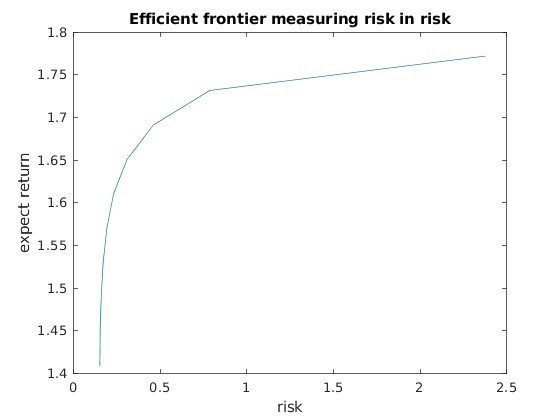

In [5]:
plot(risk_all,equidistant_points)
title('Efficient frontier measuring risk in risk')
xlabel('risk') % x-axis label
ylabel('expect return') % y-axis label

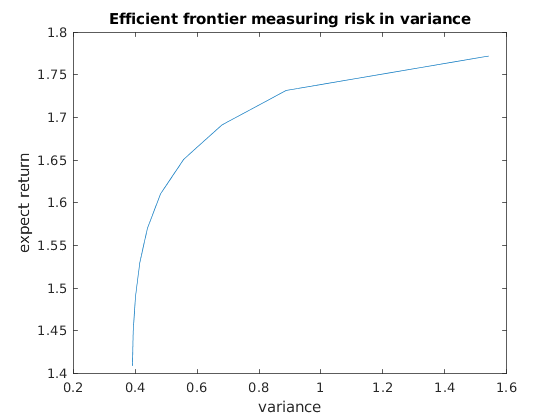

In [6]:
plot(variance_all,equidistant_points)
title('Efficient frontier measuring risk in variance')
xlabel('variance') % x-axis label
ylabel('expect return') % y-axis label